In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

data = pd.read_csv("data.csv")



# Exploratory Data Analysis 

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
pd.set_option('float_format', '{:f}'.format)
data.describe().T


,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [5]:
# Since Unnamed: 32 column doesn't have any value we are dropping it
data.drop(['Unnamed: 32', 'id'],axis = 1 ,inplace = True)

In [6]:
data_quality_report = pd.DataFrame(columns = ['feature','count', 'missing %','unique values' ,'mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR'])

i = 0
for f, ser in data._get_numeric_data().iteritems():
    
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    
    data_quality_report.at[i, :] = [f, ser.count(), (ser.isnull().sum()/ser.size)*100, ser.unique().size, ser.mean(), ser.std(), ser.min(), Q1, ser.median(), Q3, ser.max(), Q3 - Q1]
    i = i + 1
data_quality_report

,feature,count,missing %,unique values,mean,std,min,Q1,median,Q3,max,IQR
0,radius_mean,569,0.000000,456,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000,4.080000
1,texture_mean,569,0.000000,479,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000,5.630000
2,perimeter_mean,569,0.000000,522,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000,28.930000
3,area_mean,569,0.000000,539,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000,362.400000
4,smoothness_mean,569,0.000000,474,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400,0.018930
5,compactness_mean,569,0.000000,537,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400,0.065480
6,concavity_mean,569,0.000000,537,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800,0.101140
7,concave points_mean,569,0.000000,542,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200,0.053690
8,symmetry_mean,569,0.000000,432,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000,0.033800
9,fractal_dimension_mean,569,0.000000,499,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440,0.008420


### Missing Values###

In [7]:
data.isnull().sum().sum()

0

**There are no missing values in the data set.**

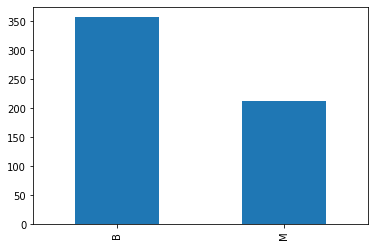

In [8]:
data['diagnosis'].value_counts().plot(kind = 'bar')

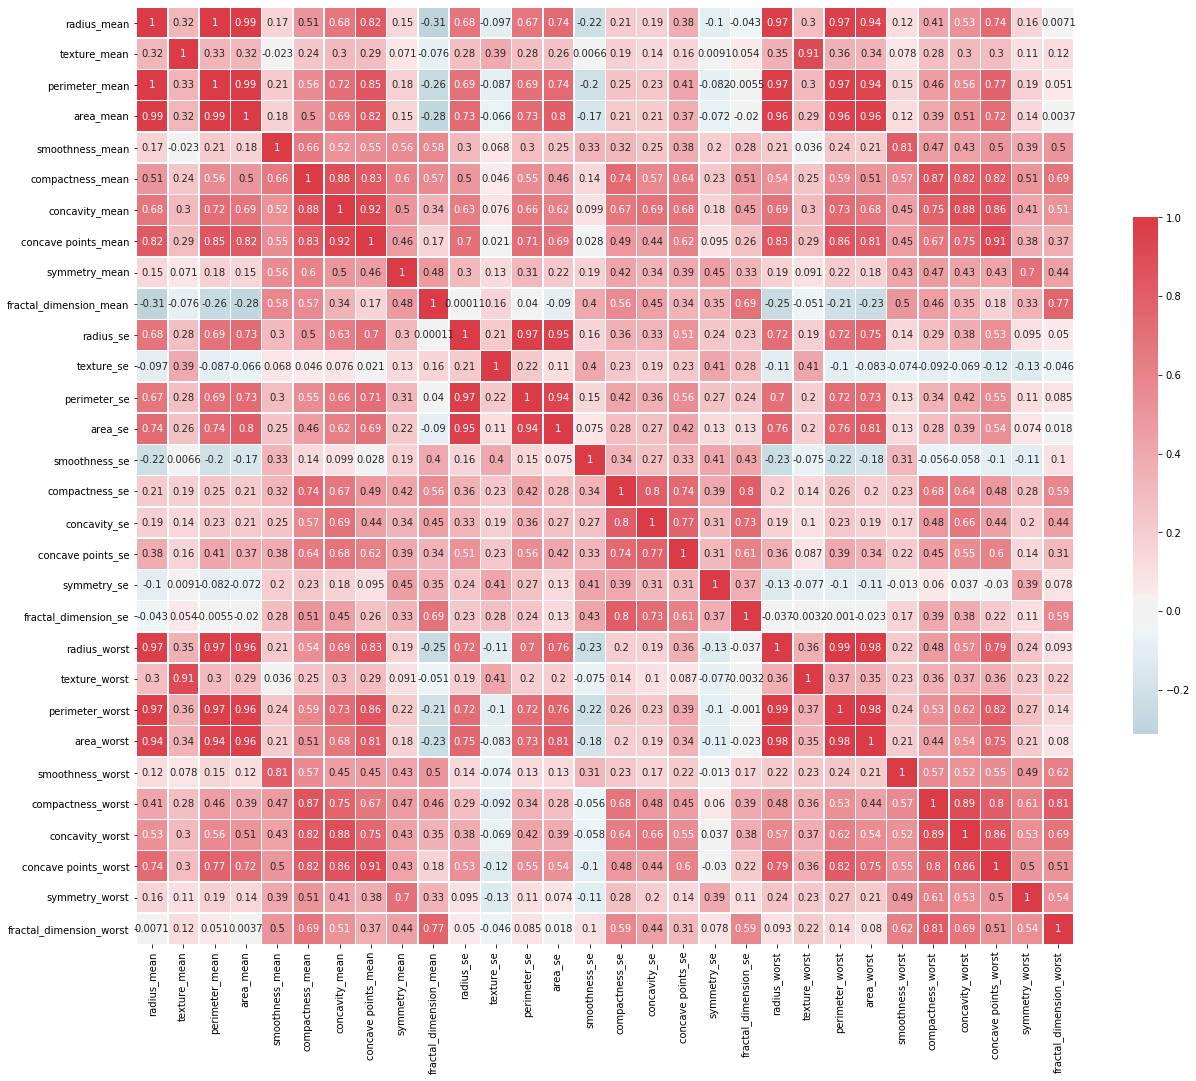

In [9]:
corr = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(21, 19))
sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [10]:
corr.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


In [11]:
#It is taking a lot of time to execute this function as there are 30 features. If you are running this on TPU or something then uncomment and run

#ns.pairplot(data);


# Data Preprocessing

In [12]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(data['diagnosis']))}
data['diagnosis'] = data['diagnosis'].map(class_mapping)
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Feature Selection###
Using chi2 test for selecting k best features from the data set to prevent the overfitting caused by the curse of dimensionality.

In [13]:
#data = data[selected_columns]
len(data.columns)


31

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored k features
select_feature = SelectKBest(chi2, k=10).fit(data.drop('diagnosis',axis = 1 ), data['diagnosis'])

print('Score list:', select_feature.scores_)
print('Feature list:', data.columns)
select_feature

Score list: [2.66104917e+02 9.38975081e+01 2.01110286e+03 5.39916559e+04
 1.49899264e-01 5.40307549e+00 1.97123536e+01 1.05440354e+01
 2.57379775e-01 7.43065536e-05 3.46752472e+01 9.79353970e-03
 2.50571896e+02 8.75850471e+03 3.26620664e-03 6.13785332e-01
 1.04471761e+00 3.05231563e-01 8.03633831e-05 6.37136566e-03
 4.91689157e+02 1.74449400e+02 3.66503542e+03 1.12598432e+05
 3.97365694e-01 1.93149220e+01 3.95169151e+01 1.34854195e+01
 1.29886140e+00 2.31522407e-01]
Feature list: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactne

SelectKBest(k=10, score_func=<function chi2 at 0x1a24fec7a0>)

In [15]:
select_feature.transform(data.drop('diagnosis',axis = 1))

array([[  17.99,   10.38,  122.8 , ...,   17.33,  184.6 , 2019.  ],
       [  20.57,   17.77,  132.9 , ...,   23.41,  158.8 , 1956.  ],
       [  19.69,   21.25,  130.  , ...,   25.53,  152.5 , 1709.  ],
       ...,
       [  16.6 ,   28.08,  108.3 , ...,   34.12,  126.7 , 1124.  ],
       [  20.6 ,   29.33,  140.1 , ...,   39.42,  184.6 , 1821.  ],
       [   7.76,   24.54,   47.92, ...,   30.37,   59.16,  268.6 ]])

In [16]:
selected_columns = np.array(data.drop('diagnosis',axis = 1).columns)[select_feature.get_support()]
selected_columns

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'], dtype=object)

Analysis Base Table

In [17]:
ABT = pd.DataFrame(select_feature.transform(data.drop('diagnosis',axis = 1)),columns=selected_columns)
y = data.diagnosis

In [18]:
ABT.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,17.990000,10.380000,122.800000,1001.000000,8.589000,153.400000,25.380000,17.330000,184.600000,2019.000000
1,20.570000,17.770000,132.900000,1326.000000,3.398000,74.080000,24.990000,23.410000,158.800000,1956.000000
2,19.690000,21.250000,130.000000,1203.000000,4.585000,94.030000,23.570000,25.530000,152.500000,1709.000000
3,11.420000,20.380000,77.580000,386.100000,3.445000,27.230000,14.910000,26.500000,98.870000,567.700000
4,20.290000,14.340000,135.100000,1297.000000,5.438000,94.440000,22.540000,16.670000,152.200000,1575.000000


In [19]:
ABT.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
perimeter_se,569.000000,2.866059,2.021855,0.757000,1.606000,2.287000,3.357000,21.980000
area_se,569.000000,40.337079,45.491006,6.802000,17.850000,24.530000,45.190000,542.200000
radius_worst,569.000000,16.269190,4.833242,7.930000,13.010000,14.970000,18.790000,36.040000
texture_worst,569.000000,25.677223,6.146258,12.020000,21.080000,25.410000,29.720000,49.540000
perimeter_worst,569.000000,107.261213,33.602542,50.410000,84.110000,97.660000,125.400000,251.200000
area_worst,569.000000,880.583128,569.356993,185.200000,515.300000,686.500000,1084.000000,4254.000000


# Modelling
1. **Information based learning** - Random Forest classifer
2. **Error based learning** - SVM, Logistic Regression
3. **Similarity based learning**- kNN classifier
3. **Probability based learning** - Naive Bayes classifier

In [20]:
compare = pd.DataFrame(index=['RandomForest', 'SVM', 'LogisticRegression', 'kNN', 'Naive Bayes'], 
                      columns=['Accuracy', 'f1 score', 'Precision', 'Recall'])
compare

,Accuracy,f1 score,Precision,Recall
RandomForest,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN
LogisticRegression,NaN,NaN,NaN,NaN
kNN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN


## Information Based Learning ##
### **Random Forest Classifier** ###


In [21]:
X_train, X_test, y_train, y_test = train_test_split(ABT, y, test_size=0.2, random_state=0)
X_train, X_v, y_train, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Accuracy on validation set is 0.9560439560439561
f1 score on validation set is 0.9411764705882353
Precision on validation set is 1.0
Recall on validation set is 0.8888888888888888


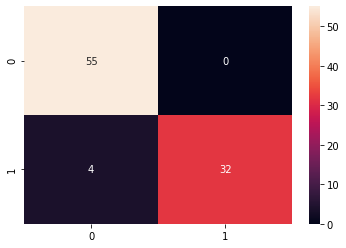

In [22]:
rf = RandomForestClassifier(criterion='gini', n_estimators=1000, max_depth=3, random_state=0, n_jobs=-1)      
rf = rf.fit(X_train,y_train)

y_pred = rf.predict(X_v)
print(f'Accuracy on validation set is {accuracy_score(y_v,y_pred)}')
print(f'f1 score on validation set is {f1_score(y_true=y_v, y_pred=y_pred)}')
print(f'Precision on validation set is {precision_score(y_true=y_v, y_pred=y_pred)}')
print(f'Recall on validation set is {recall_score(y_true=y_v, y_pred=y_pred)}')
confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")


Accuracy on test set is 0.9649122807017544
f1 score on test set is 0.9574468085106385
Precision on test set is 0.9574468085106383
Recall on test set is 0.9574468085106383


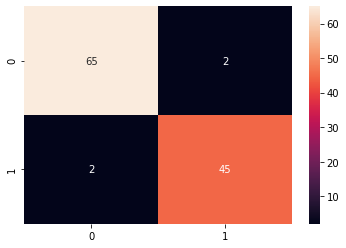

In [23]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)


compare.at['RandomForest', :] = (accuracy, f1, precision, recall)

print(f'Accuracy on test set is {accuracy}')
print(f'f1 score on test set is {f1}')
print(f'Precision on test set is {precision}')
print(f'Recall on test set is {recall}')


confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")


## Error Based Learning ##
> ### **1. SVM **###
> ### **2. Logistic Regression**###


### **Normalization** ### 
Performing normalization for further models.<br /> 
RandomForest didn't require it.<br /> 

After normalization we will get NormalizedABT, so will split this into 3 sets for training, cross-validation and testing.

In [24]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
NormalizedABT = min_max_scaler.fit_transform(ABT)
NormalizedABT=pd.DataFrame(NormalizedABT, columns=selected_columns)
X_train, X_test, y_train, y_test = train_test_split(NormalizedABT, y, test_size=0.2, random_state=0)
X_train, X_v, y_train, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
NormalizedABT.describe().T


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,0.338222,0.166787,0.000000,0.223342,0.302381,0.416442,1.000000
texture_mean,569.000000,0.323965,0.145453,0.000000,0.218465,0.308759,0.408860,1.000000
perimeter_mean,569.000000,0.332935,0.167915,0.000000,0.216847,0.293345,0.416765,1.000000
area_mean,569.000000,0.216920,0.149274,0.000000,0.117413,0.172895,0.271135,1.000000
perimeter_se,569.000000,0.099376,0.095267,0.000000,0.040004,0.072092,0.122509,1.000000
area_se,569.000000,0.062636,0.084967,0.000000,0.020635,0.033112,0.071700,1.000000
radius_worst,569.000000,0.296663,0.171940,0.000000,0.180719,0.250445,0.386339,1.000000
texture_worst,569.000000,0.363998,0.163813,0.000000,0.241471,0.356876,0.471748,1.000000
perimeter_worst,569.000000,0.283138,0.167352,0.000000,0.167837,0.235320,0.373475,1.000000
area_worst,569.000000,0.170906,0.139932,0.000000,0.081130,0.123206,0.220901,1.000000


### SVM - Support Vector Machine classifier


Accuracy on validation set is 0.945054945054945
f1 score on validation set is 0.927536231884058
Precision on validation set is 0.9696969696969697
Recall on validation set is 0.8888888888888888


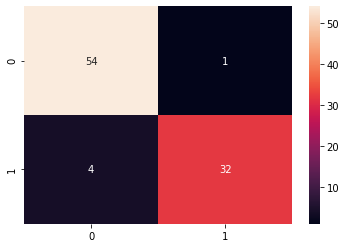

In [25]:
from sklearn import svm

clf = svm.SVC().fit(X_train, y_train)
y_pred = clf.predict(X_v)

print(f'Accuracy on validation set is {accuracy_score(y_v,y_pred)}')
print(f'f1 score on validation set is {f1_score(y_true=y_v, y_pred=y_pred)}')
print(f'Precision on validation set is {precision_score(y_true=y_v, y_pred=y_pred)}')
print(f'Recall on validation set is {recall_score(y_true=y_v, y_pred=y_pred)}')

confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")



Accuracy on test set is 0.956140350877193
f1 score on test set is 0.9473684210526315
Precision on test set is 0.9375
Recall on test set is 0.9574468085106383


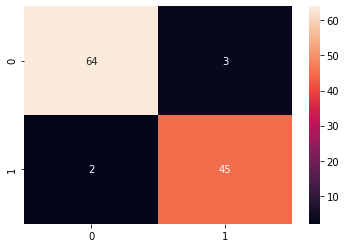

In [26]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)

compare.at['SVM', :] = (accuracy, f1, precision, recall)

print(f'Accuracy on test set is {accuracy}')
print(f'f1 score on test set is {f1}')
print(f'Precision on test set is {precision}')
print(f'Recall on test set is {recall}')

confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")


### Logistic Regression Model

Accuracy on validation set is 0.9120879120879121
f1 score on validation set is 0.8823529411764706
Precision on validation set is 0.9375
Recall on validation set is 0.8333333333333334


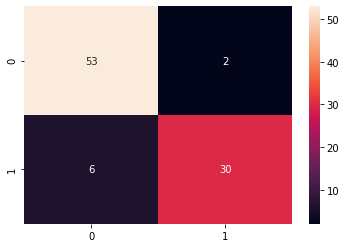

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_v)

print(f'Accuracy on validation set is {accuracy_score(y_v,y_pred)}')
print(f'f1 score on validation set is {f1_score(y_true=y_v, y_pred=y_pred)}')
print(f'Precision on validation set is {precision_score(y_true=y_v, y_pred=y_pred)}')
print(f'Recall on validation set is {recall_score(y_true=y_v, y_pred=y_pred)}')

confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")


Accuracy on test set is 0.9210526315789473
f1 score on test set is 0.898876404494382
Precision on test set is 0.9523809523809523
Recall on test set is 0.851063829787234


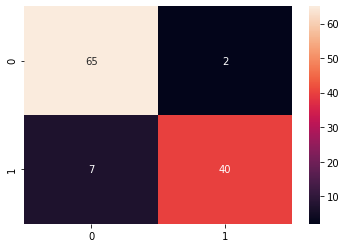

In [28]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)

compare.at['LogisticRegression', :] = (accuracy, f1, precision, recall)

print(f'Accuracy on test set is {accuracy}')
print(f'f1 score on test set is {f1}')
print(f'Precision on test set is {precision}')
print(f'Recall on test set is {recall}')


confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")


## Similarity Based Learning ##
### kNN classifier ###


Accuracy on validation set is 0.945054945054945
f1 score on validation set is 0.927536231884058
Precision on validation set is 0.9696969696969697
Recall on validation set is 0.8888888888888888


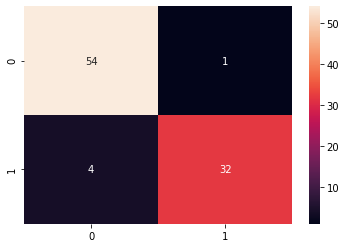

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=19).fit(X_train, y_train)

y_pred = clf.predict(X_v)

print(f'Accuracy on validation set is {accuracy_score(y_v,y_pred)}')
print(f'f1 score on validation set is {f1_score(y_true=y_v, y_pred=y_pred)}')
print(f'Precision on validation set is {precision_score(y_true=y_v, y_pred=y_pred)}')
print(f'Recall on validation set is {recall_score(y_true=y_v, y_pred=y_pred)}')

confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")


Accuracy on test set is 0.956140350877193
f1 score on test set is 0.9473684210526315
Precision on test set is 0.9375
Recall on test set is 0.9574468085106383


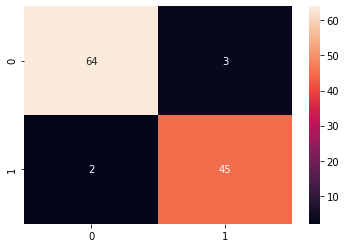

In [30]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)

compare.at['kNN', :] = (accuracy, f1, precision, recall)

print(f'Accuracy on test set is {accuracy}')
print(f'f1 score on test set is {f1}')
print(f'Precision on test set is {precision}')
print(f'Recall on test set is {recall}')

confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")


## Probability Based Learning ##
### Naive Bayes classifier ###


Accuracy on validation set is 0.9120879120879121
f1 score on validation set is 0.8857142857142858
Precision on validation set is 0.9117647058823529
Recall on validation set is 0.8611111111111112


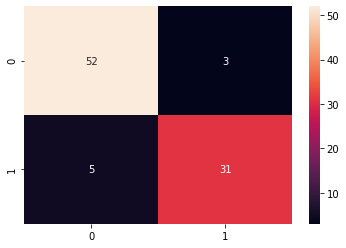

In [31]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train, y_train)

y_pred = clf.predict(X_v)

print(f'Accuracy on validation set is {accuracy_score(y_v,y_pred)}')
print(f'f1 score on validation set is {f1_score(y_true=y_v, y_pred=y_pred)}')
print(f'Precision on validation set is {precision_score(y_true=y_v, y_pred=y_pred)}')
print(f'Recall on validation set is {recall_score(y_true=y_v, y_pred=y_pred)}')

confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")


Accuracy on test set is 0.9385964912280702
f1 score on test set is 0.9230769230769231
Precision on test set is 0.9545454545454546
Recall on test set is 0.8936170212765957


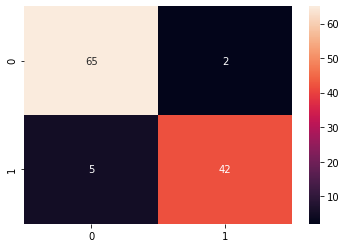

In [32]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)

compare.at['Naive Bayes', :] = (accuracy, f1, precision, recall)

print(f'Accuracy on test set is {accuracy}')
print(f'f1 score on test set is {f1}')
print(f'Precision on test set is {precision}')
print(f'Recall on test set is {recall}')

confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")


In [33]:
compare

,Accuracy,f1 score,Precision,Recall
RandomForest,0.964912,0.957447,0.957447,0.957447
SVM,0.956140,0.947368,0.937500,0.957447
LogisticRegression,0.921053,0.898876,0.952381,0.851064
kNN,0.956140,0.947368,0.937500,0.957447
Naive Bayes,0.938596,0.923077,0.954545,0.893617
